In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from iminuit import Minuit

In [26]:
#Daten einlesen
with open('1_3CO_67849ms.txt') as data:
    adcvalue_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3CO_67849ms.txt') as data:
    counts_coeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_3CS_70534ms.txt') as data:
    adcvalue_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3CS_70534ms.txt') as data:
    counts_cseich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('1_3NA_70358ms.txt') as data:
    adcvalue_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('1_3NA_70358ms.txt') as data:
    counts_naeich = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")


energy_calibration_y = []
energy_calibration_y_error = []
energy_calibration_y_sigma = []
energy_calibration_x = []



In [27]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_gauss(x, a,b, A, x0, sigma):
    return line(x,a,b) + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_double_gauss(x, a,b, A1, x01, sigma1,A2, x02, sigma2):
    return line(x,a,b) + A1 * np.exp(-(x - x01) ** 2 / (2 * sigma1 ** 2)) + A2 * np.exp(-(x - x02) ** 2 / (2 * sigma2 ** 2))

#TODO: Doppelgaußfit und Linearer Untergrund 
#TODO: integral nicht 3 sigma sondern über \sqrt(2pi) sigma A
#Gaußfits
def lin_fit(x,y,startparameter):
    popt, pcov = curve_fit(line, x, y, p0=startparameter, absolute_sigma=True)
    return popt,pcov

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma], absolute_sigma=True)
    return popt[0], popt[1] , popt[2], popt[3], np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])

def lin_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(pcov)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4])

def lin_double_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_double_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], popt[5], popt[6],popt[7],np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4]), np.sqrt(pcov[5,5]), np.sqrt(pcov[6,6]), np.sqrt(pcov[7,7])

#a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler

# least-squares score function = sum of data residuals squared
def LSQ(a, b,x,y,sigma_y):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

Amplitude A Na 511: 652.145803378213
Amplitude A Fehler Na 511: 0.10932702985565357
Erwartungswert mu Na 511: 5.290448196132377
Erwartungswert mu Fehler Na 511: 0.000036
Standardabweichung sigma Na 511: 0.18772637172123022
Standardabweichung sigma Fehler Na 511: 0.000038
Kalibrierungsfaktor Na 511: 125.13117517792921
Feher Kalibrierungsfaktor Na 511: 0.035484
Anzahl gemessener Events in 3 sigma Intervall:  (612.090766306629, 6.795572568205066e-12)
Anzahl gemessener Events aus Analytischem Integral:  613.7477600931619
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.162210220987114
Amplitude A Na 1275: 207.85290128422707
Amplitude A Fehler Na 1275: 0.18038371143834292
Erwartungswert mu Na 1275: 12.202460893541653
Erwartungswert mu Fehler Na 1275: 0.000299
Standardabweichung sigma Na 1275: 0.30580605300501684
Standardabweichung sigma Fehler Na 1275: 0.000349
Kalibrierungsfaktor Na 1275: 104.48712035412578
Feher Kalibrierungsfaktor Na 1275: 0.000029
Anzahl gemessener Events i

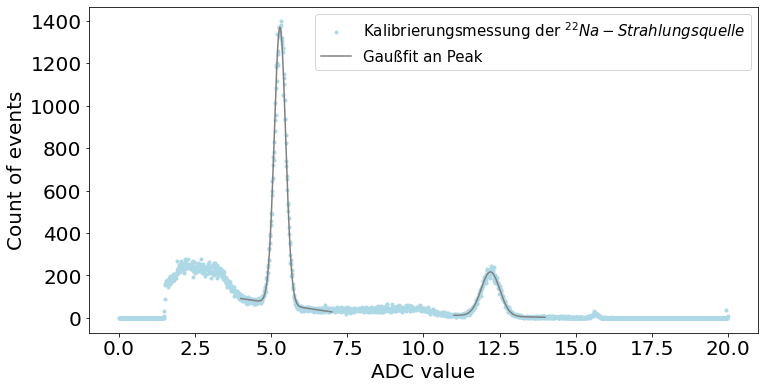

In [28]:
#na-Eichung
adc = adcvalue_naeich
count = counts_naeich


gaussstart = 400
gaussstop = 700
gaussstart2 = 1100
gaussstop2 = 1400

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{22}Na-Strahlungsquelle$")
#ax.set_ylim(0,)
# ax.vlines(4,0,400)
# ax.vlines(7,0,400)
# ax.vlines(11,0,400)
# ax.vlines(14,0,400)


#Gauß 511
startparameter = 200, -10, 1400, 5.3,0.3
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
#print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigma/x0
print("Amplitude A Na 511:",A/2)
print("Amplitude A Fehler Na 511:",Afehler/2)
print("Erwartungswert mu Na 511:",x0)
print("Erwartungswert mu Fehler Na 511:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Na 511:",sigma)
print("Standardabweichung sigma Fehler Na 511:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Na 511:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 511:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)


#Gauß 1275
startparameter = 200, -1, 200, 12.5, 1
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1= lin_gauss_fit(adc[gaussstart2:gaussstop2] , count[gaussstart2:gaussstop2],startparameter)
FWHM1275 = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart2:gaussstop2], lin_gauss(adc[gaussstart2:gaussstop2], a, b,A1, x01, sigma1), color = "grey", label="Gaußfit an Peak")

na_photopeak1 = 1275
calibrationfactor1 = na_photopeak1 / x01
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Na 1275:",A1)
print("Amplitude A Fehler Na 1275:",Afehler1)
print("Erwartungswert mu Na 1275:",x01)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Na 1275:",sigma1)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor1)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler1))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(na_photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

#Intensity using integral
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Co 1173: 168.06316043180703
Amplitude A Fehler Co 1173: 0.188939
Erwartungswert mu Co 1173: 10.848426293479294
Erwartungswert mu Fehler Co 1173: 0.000323
Standardabweichung sigma Co 1173: 0.2575248875426319
Standardabweichung sigma Fehler Co 1173: 0.000350
Kalibrierungsfaktor Co 1173: 125.13117517792921
Feher Kalibrierungsfaktor Co 1173: 0.035484
Anzahl gemessener Events aus Analytischem Integral:  108.48799091114078
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.19144381256831586
Amplitude A Co 1333: 141.03871271550412
Amplitude A Fehler Co 1333: 0.183987
Erwartungswert mu Co 1333: 12.176452294004214
Erwartungswert mu Fehler Co 1333: 0.000397
Standardabweichung sigma Co 1333: 0.27351278792159633
Standardabweichung sigma Fehler Co 1333: 0.000434
Kalibrierungsfaktor Co 1333: 109.47359442753127
Feher Kalibrierungsfaktor Co 1333: 0.000036
Anzahl gemessener Events in 3 sigma Intervall:  (96.4343624870172, 1.0706364993780942e-12)
Anzahl gemessener Events aus Analy

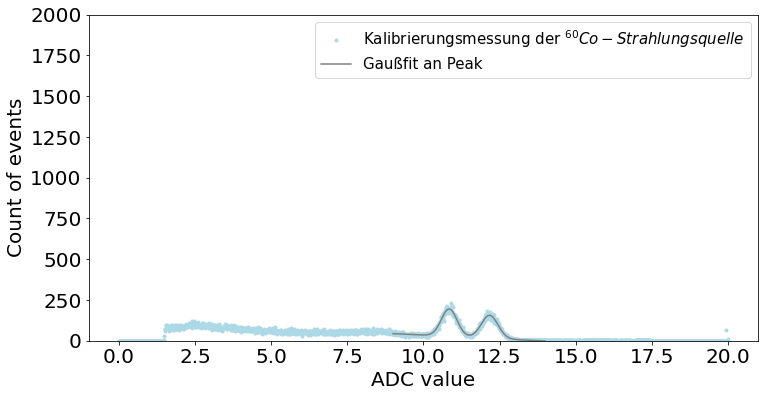

In [29]:
#co-Eichung
adc = adcvalue_coeich
count = counts_coeich

gaussstart = 900
gaussstop = 1400

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Strahlungsquelle$")


#Gauß 1.173
startparameter = 250,-1, 250, 11.0, 0.5,250, 12.0, 0.5
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
FWHM511 = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Peak")

#Co-1173
photopeak1 = 1173
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Co 1173:",A1)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Co 1173:",x01)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Co 1173:",sigma1)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

#Co-1333
photopeak2 = 1333
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Co 1333:",A2)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Co 1333:",x02)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Co 1333:",sigma2)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler2))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

plt.ylim(0,2000)
ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

108.11647821323588 -14.023224689818415 1102.8013350362878 6.461086248591411 0.2066095428157891
Y-Abschnitt Cs 662 108.11647821323588
Steigung Cs 662 -14.023224689818415
Amplitude A Cs 662: 1102.8013350362878
Amplitude A Fehler Cs 662: 0.208803
Erwartungswert mu Cs 662: 6.461086248591411
Erwartungswert mu Fehler Cs 662: 0.000044
Standardabweichung sigma Cs 662: 0.2066095428157891
Standardabweichung sigma Fehler Cs 662: 0.000048
Kalibrierungsfaktor Cs 662: 102.45955161863431
Feher Kalibrierungsfaktor Cs 662: 0.000007
Anzahl gemessener Events aus Analytischem Integral:  571.133446721209
Anzahl gemessener Events aus Analytischem Integral Fehler:  0.17080008819097864
Anzahl gemessener Events in 3 sigma Intervall:  (569.591502890155, 6.3237360226758854e-12)
Comptonadc und -energie:  0.675 69.16019734257816


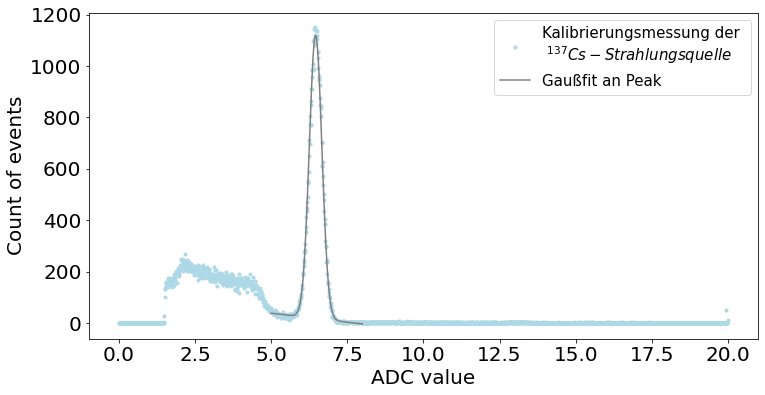

In [30]:
#cs-Eichung
adc = adcvalue_cseich
count = counts_cseich

gaussstart = 500
gaussstop = 800

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der \n $^{137}Cs-Strahlungsquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 200, -5, 1200, 7.0, 0.5
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Peak")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Comptonkante: 4.859999999999999


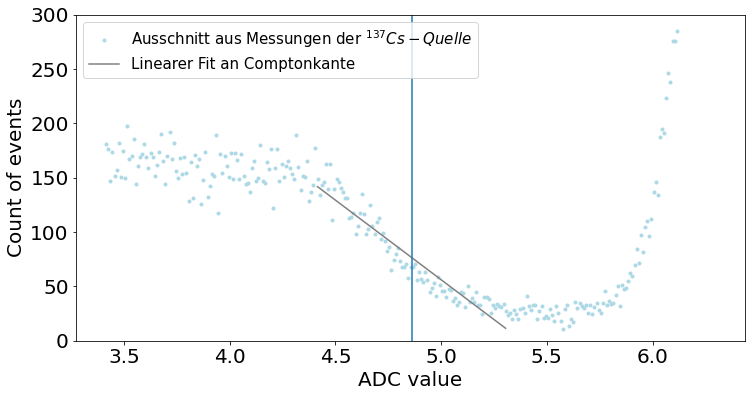

In [31]:
#Comptonkante Fit Cs
comptonstart = 441
comptonstop = 530
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)


#Plotten der unskalierten Kurven
ax.plot(adc[comptonstart-100:comptonstop+100], count[comptonstart-100:comptonstop+100],'o',markersize=3, color = "lightblue",label = "Ausschnitt aus Messungen der $^{137}Cs-Quelle$")
plt.ylim(0,300)
# ax.vlines(4.4,000,300)
# ax.vlines(5.3,000,300)



#Fit an Gerade
startparameter = 5000, -200
popt,pcov = lin_fit(adc[comptonstart:comptonstop+1],count[comptonstart:comptonstop+1],startparameter)
ax.plot(adc[comptonstart:comptonstop+1], line(adc[comptonstart:comptonstop+1], popt[0],popt[1]), color = "grey", label="Linearer Fit an Comptonkante")
comptonkante_adc= (adc[comptonstop]+adc[comptonstart])/2
ax.vlines(comptonkante_adc,000,400)
print("Comptonkante:", comptonkante_adc)
#ax.vlines(comptonstart,0,5000)
#ax.vlines(comptonstop,0,5000)

ax.legend(fontsize=15)

Steigung: 100.2325459537333
Steigung Fehler: 8.267546529176238
Y-Abschnitt: 79.2375720765456
Y-Abschnitt Fehler: 81.3913710879116


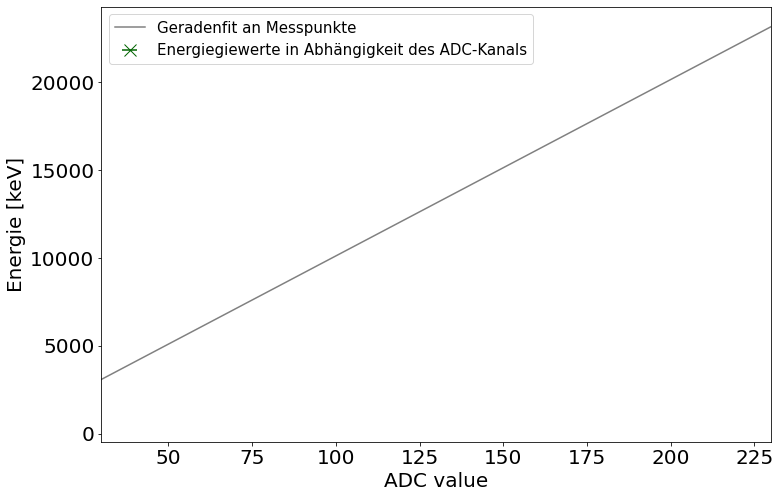

In [32]:
#Energiekalibration
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(30, 230)

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Energie [keV]', fontsize=20)

#Plotten der unskalierten Kurven
# linear_model=np.polyfit(energy_calibration_x,energy_calibration_y,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(30,230)

params, cov = curve_fit(line,energy_calibration_y, energy_calibration_x)
x_fit = np.linspace(30,230)
ax.errorbar(energy_calibration_y, energy_calibration_x, xerr=energy_calibration_y_error,fmt='x',markersize=12, color = "darkgreen",label = "Energiegiewerte in Abhängigkeit des ADC-Kanals")
ax.plot(x_fit, line(x_fit, params[0], params[1]), color = "grey", label="Geradenfit an Messpunkte")
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)